In [1]:
import numpy as np
import torch
from tqdm import tqdm,tqdm_notebook
import torchvision
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn ,optim
import torch.nn.functional as F
from torch.utils import data

In [2]:
train_set = torchvision.datasets.FashionMNIST(root='Data',train = True , download= True ,
                                              transform = transforms.Compose([transforms.ToTensor()]))
# train_loader = DataLoader(train_set, batch_size = 32,shuffle=True)
train, val,test = data.random_split(train_set,[50000,5000,5000])
train_loader = DataLoader(train , batch_size=32 , shuffle=True)
val_loader = DataLoader(val , batch_size = 32, shuffle=True)
test_loader = DataLoader(test , batch_size = 32, shuffle=True)


In [3]:
for img, labels in train_loader:
#     print(img.shape,labels.shape)
    print(torch.flatten(img,start_dim=1).shape)
    break
print(len(train_loader),len(val_loader),len(test_loader))


torch.Size([32, 784])
1563 157 157


In [4]:
model = nn.Sequential(nn.Linear(28*28,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax(dim=1)
                     )


In [5]:
for imgs,labels in val_loader:
    output = model.forward(torch.flatten(imgs,start_dim=1))
    print(output.shape)
    print(labels.shape)
#     print(output)
    break

torch.Size([32, 10])
torch.Size([32])


In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.003)

In [12]:
train_loss_list = []
validation_loss_list = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    val_loss = 0
    for images,labels in train_loader:
        
        optimizer.zero_grad()
        
        output = model.forward(torch.flatten(images,start_dim=1))
        
        loss = loss_function(output,labels)
        
        loss.backward() 
        optimizer.step()
        running_loss += loss.item()
    for images,labels in val_loader:
        
        optimizer.zero_grad()
        with torch.no_grad():
            output = model.forward(torch.flatten(images,start_dim=1))
        
        loss = loss_function(output,labels)
        
        val_loss += loss.item()
    print(f"Training loss : {(running_loss/len(train_loader)):.5f} , Validation loss : {(val_loss/len(val_loader)):.5f}")
    train_loss_list.append(running_loss/len(train_loader))
    validation_loss_list.append(val_loss/len(val_loader))

Training loss : 0.56854 , Validation loss : 0.54130
Training loss : 0.53780 , Validation loss : 0.50857
Training loss : 0.51501 , Validation loss : 0.49737
Training loss : 0.49740 , Validation loss : 0.47620
Training loss : 0.48246 , Validation loss : 0.47047
Training loss : 0.47116 , Validation loss : 0.47494
Training loss : 0.46126 , Validation loss : 0.45459
Training loss : 0.45346 , Validation loss : 0.45055
Training loss : 0.44637 , Validation loss : 0.44023
Training loss : 0.43901 , Validation loss : 0.43734


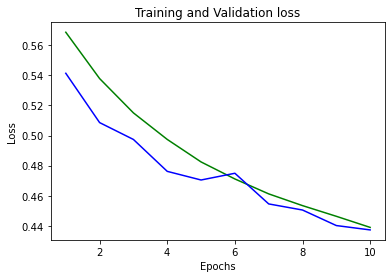

In [22]:
import matplotlib.pyplot as plt
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
epoch = list(range(1,11))
plt.plot(epoch, train_loss_list, 'g', label='Training loss')
plt.plot(epoch, validation_loss_list, 'b', label='validation loss')

In [24]:
model.eval()
total = 0
count = 0
for img,labels in test_loader:
    prediction = model.forward(torch.flatten(img,start_dim=1))
    pred_nums = torch.argmax(prediction,dim=1)
    for pred_num,actual_label in zip(pred_nums,labels):
        if pred_num==actual_label:
            count+=1
        total+=1
print("Accuracy is : ",count*100/total)

Accuracy is :  83.84


In [37]:
classes = {0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot'}

TypeError: 'dict' object is not callable

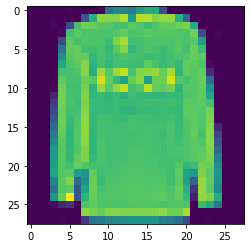

In [38]:

dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[1]
ps = torch.exp(model(img.view(-1,784)))
plt.imshow(img.view(28,28))
# print(torch.argmax(ps))
print(classes[(]int(labels[1])))